#### M4W Series

* [Table of Contents](M4WTOC.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/m4w/blob/main/Tetravolumes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/m4w/blob/main/Tetravolumes.ipynb)

# Tetravolumes and Quadrays

In the late 1970s, R. Buckminster Fuller published his findings regarding a tetrahedrally based geometry that conceived of 2nd and 3rd power changes in terms of area and volume, which is standard. But then instead of a square and cube, he used a triangle and tetrahedron respectively, for his areal and volumetric units.

The scheme has its charm. For one thing, the tetrahedron is topologically simpler than the cube, and is indeed the simplest wireframe container, the simplest polyhedron that divides an interior from an exterior. For another, the tetrahedron is a logical unit in a sphere packing context.

Quadrays came later, adapting the usual idea of a vector space to our sphere packing context. Four rays, without needing their negative mirror images, and at 109.47 degrees to one another, span the same space as XYZ vectors, with conventions in place to go back and forth between them. The sphere packing context corresponds to the CCP (cubic close packing) which in turn corresponds to a lattice Fuller dubbed the IVM (isotropic vector matrix).
<div style="text-align: center;">
<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4723083407/" title="Quadray Coordinates"><img src="https://live.staticflickr.com/1213/4723083407_1e315f2877_o.gif" width="400" height="350" alt="Quadray Coordinates"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
</div>
<div style="text-align: center;">
The four quadrays (in blue)
</div>
<br/>

### Terminology

The terminology used around quadrays is heretical from the standpoint of ordinary linear algebra, in that the four anchoring vectors of the home base tetrahedron get referred to as "basis vectors", when in fact, they sum to the zero vector. 

The [standard linear algebra](https://youtu.be/nTwRjQ4xqUc) definition holds that: 

(a) any set of independent vectors cannot sum to zero; that's what dependent vectors do, and 

(b) basis vectors must be independent, by definition.

When we say "sum" we mean sequencing from the tip of one to the tail of another, like stepping stones, allowing for the arbitrary growing and shrinking (scaling) of each component. Scaling typically includes vector reversal (negative scaling) however we're interested in distinguishing vector sets that do vs do not require negation when spanning a volume.

For instance, the three basis vectors of XYZ, i, j, k span only one octant of XYZ space unless their "shadow" negative reflections enter the picture, giving the usual six-spoke system. 

Vector -i, the negation of i, may seem just as primary, but is considered derived, through the operation of negation. 

Vectors i and -i are conventionally dependent because i + -i = the zero vector. Only one of these two (i or -i) may be considered a basis vector, take your pick. We might call these left and right handed basis sets accordingly: (i,j,k) vs (-i, -j, -k).

Given i, j, k: a single vector -(i + j + k) would be sufficient to reach the rest of space, in linear combination with i, j, k, with only positive scaling (i.e. without vector reversal). 

Re-pointing these four vectors such that any two form an angle of 109.47 degrees returns us to our home base: the quadrays.

Since we use our apparatus andragogically (and pedagogically) -- with adults and children alike -- to introduce R.B. Fuller's usage of the "4D" meme, in contradistinction to the more universally understood "3D" meme, it makes sense to say we're in a namespace outside that of linear algebra, in an adjacent namespace that only partially overlaps with the latter.

## Computing Tetravolumes

In [1]:
import sys
sys.version

'3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 09:05:00) [Clang 14.0.6 ]'

In [2]:
import tetravolume as tv
import tetravolume
import itertools as it
import qrays
from qrays import Qvector, Vector  # sets the level of precision to 50
import sympy as sp
from sympy import N, Integer, acos
from random import choice
from mpmath import degrees
import mpmath

<div style="text-align: center;">
<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51779827881/" title="ch_quadrays"><img src="https://live.staticflickr.com/65535/51779827881_9cbe262e04_o.gif" width="320" height="240" alt="ch_quadrays"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
</div>
<div style="text-align: center;">
Labeled vertexes
</div>
<br />
The outermost wireframe polyhedron, or network, is in yellow and is defined by the 12 vertices o-z. These are the 12 spokes from the center of an IVM ball to the centers of the 12 neighbors, length = 1 D (one sphere diameter) = 2 R (two radii).

In [3]:
from string import ascii_lowercase as asc
asc

'abcdefghijklmnopqrstuvwxyz'

In [4]:
asc[-12:]

'opqrstuvwxyz'

In [5]:
? it.permutations ?

Init signature:  it.permutations (iterable, r=None)
Docstring:     
Return successive r-length permutations of elements in the iterable.

permutations(range(3), 2) --> (0,1), (0,2), (1,0), (1,2), (2,0), (2,1)
Type:           type
Subclasses:     

A feature of this demo is we're using arbitrary precision floats, like in Mathematica, but here from sympy. This allows for more accurate volume computations.

The goal is to find any triplet of radial vectors, from the set o-z, that define a 60-60-60 degree corner, and that therefore define the corner of a regular tetrahedron. The edges from that corner are what we will stretch or shrink, without varying their angular relationships.

In multiplying these three vectors of length A, B, C, we expect to get a tetravolume of those three same lengths as a product i.e. |A||B||C|.  
In the figure: $(2)(2)(5) = 20$
<div style="text-align: center;">
<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/41211295565/" title="Martian Multiplication (2 x 2 x 5 &#x3D; 20)"><img src="https://live.staticflickr.com/907/41211295565_59145e2f63_c.jpg" width="800" height="498" alt="Martian Multiplication (2 x 2 x 5 &#x3D; 20)"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
</div>
<div style="text-align: center;">
2 x 2 x 5 = 20 tetravolumes
</div>
<br/>


In [6]:
Integer(1) # make it a sympy type Integer (not Python's int)

1

In [7]:
type(Integer(1))

sympy.core.numbers.One

Our trick for getting all unique Qvectors made from one 2, two 1s, one 0, is to use Python's Standard Library to get permutations, but screening out any duplicates. The two 1s will be treated as separate elements by default, but for what we're doing, there's no difference between them.

In [8]:
spokes = list(set(it.permutations(
    (Integer(2),
     Integer(1),
     Integer(1),
     Integer(0))
    ))) # 12 unique permutations
spokes

[(1, 0, 1, 2),
 (2, 1, 1, 0),
 (1, 1, 2, 0),
 (0, 1, 2, 1),
 (1, 0, 2, 1),
 (1, 2, 0, 1),
 (2, 1, 0, 1),
 (2, 0, 1, 1),
 (1, 1, 0, 2),
 (1, 2, 1, 0),
 (0, 2, 1, 1),
 (0, 1, 1, 2)]

In [9]:
type(spokes[0][1]) # make sure our coordinates are still Sympy objects

sympy.core.numbers.Zero

<div style="text-align: center">
<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52193489986/in/photolist-VCswki-2nwahbo-XmFYtj" title="twelve_directions"><img src="https://live.staticflickr.com/65535/52193489986_dbd1a03798_z.jpg" width="640" height="480" alt="twelve_directions"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
</div>
<br />
<div style="text-align: center">
The twelve spokes from any ball to 12 neighbors
</div>
<br />
Next we're matching the labels o-z with these 12 unique directions. We don't really care how labels are applied as we know we'll be able to find a corner of the type we seek: 60-60-60 (degrees). The tip of a regular tetrahedron, in terms of three labeled vectors. What we need for our volumes demo.

In [10]:
vecs = { label:Qvector(v) for label,v in zip(list(asc[-12:]), spokes)}

In [11]:
type(vecs)

dict

In [12]:
vecs  # 12 vectors expressed in quadray coordinates (4-tuples, no negatives in the canonical representation)

{'o': ivm_vector(a=1, b=0, c=1, d=2),
 'p': ivm_vector(a=2, b=1, c=1, d=0),
 'q': ivm_vector(a=1, b=1, c=2, d=0),
 'r': ivm_vector(a=0, b=1, c=2, d=1),
 's': ivm_vector(a=1, b=0, c=2, d=1),
 't': ivm_vector(a=1, b=2, c=0, d=1),
 'u': ivm_vector(a=2, b=1, c=0, d=1),
 'v': ivm_vector(a=2, b=0, c=1, d=1),
 'w': ivm_vector(a=1, b=1, c=0, d=2),
 'x': ivm_vector(a=1, b=2, c=1, d=0),
 'y': ivm_vector(a=0, b=2, c=1, d=1),
 'z': ivm_vector(a=0, b=1, c=1, d=2)}

In [13]:
triplets = it.combinations(asc[-12:],3)

In [14]:
triplet = next(triplets)
triplet

('o', 'p', 'q')

In [15]:
def get_angles(a, b, c):
    v0, v1, v2 = vecs[a], vecs[b], vecs[c]
    return (v0.angle(v1), v1.angle(v2), v2.angle(v0))

In [16]:
get_angles('o', 'p', 'q')

(120.00000000000000000000000000000000000000000000000,
 60.000000000000000000000000000000000000000000000000,
 120.00000000000000000000000000000000000000000000000)

In [17]:
for triplet in it.combinations(asc[-12:],3):
    if ([n.evalf(2) for n in get_angles(*triplet)] 
            == [60.0, 60.0, 60.0]):
        print(triplet)
        break
triplet

('o', 's', 'v')


('o', 's', 'v')

What we're obtaining below is all eight combinations of the twelve vectors that define a 60-60-60 degree corner. The total number of combinations is "take 3 from 12" or...

In [18]:
len(list(it.combinations(asc[-12:],3)))

220

Python's list comprehension syntax, which allows for an if condition filter, is perfect for collecting the triplets that qualify.

In [19]:
all_tet_tips = [triplet for triplet in it.combinations(asc[-12:],3) 
                if ([n.evalf(2) for n in get_angles(*triplet)] 
                    == [60.0, 60.0, 60.0])]
all_tet_tips # should be 8

[('o', 's', 'v'),
 ('o', 'w', 'z'),
 ('p', 'q', 'x'),
 ('p', 'u', 'v'),
 ('q', 'r', 's'),
 ('r', 'y', 'z'),
 ('t', 'u', 'w'),
 ('t', 'x', 'y')]

Lets choose any set of three vectors at random from this list of qualified triplets and confirm the angles between them. We will relabel the vectors to a, b and c. They share a common tail and currently all have length D.

In Fuller's Synergetics, the tetrahedron with all edges D has volume 1. Our IVM volume formula will give that answer, along with a corresponding XYZ volume. There's a mathematical constant that relates them: $\sqrt{9/8}$.

In [20]:
tip = choice(all_tet_tips)      # pick at random
a,b,c = [vecs[k] for k in tip]  # look them up by label

In [21]:
N(a.angle(b),50), N(b.angle(c),50), N(c.angle(a),50)

(60.000000000000000000000000000000000000000000000000,
 60.000000000000000000000000000000000000000000000000,
 60.000000000000000000000000000000000000000000000000)

In [22]:
tet = tv.Tetrahedron(a.length(), b.length(), c.length(), 
                     (a-b).length(), (a-c).length(), (b-c).length())
tet.ivm_volume()

1.0000000000000000000000000000000000000000000000000

Now lets stretch these three vectors by means of scalar multiplication. They will elongate, but not change their relative orientation.  

The three vectors will define a fourth face with their termini. We could call this "the lid".  Simply connect vector tips with the three missing edges.

Given we know the angles and lengths of the initial three vectors, we have the computer come up with these remaining three, those of the lid or fourth face.  With all six vectors, we're ready to compute the volume. We have several methods available, including for starting from six edges. This notebook uses the one we got from Gerald de Jong, the Elastic Interval Geometry pioneer.

<div style="text-align: center;">
<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/39391693474" title="Computer Volume"><img src="https://live.staticflickr.com/4672/39391693474_c6c54f3d22.jpg" width="500" height="463" alt="Computer Volume"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
</div>
<div style="text-align: center;">
Gerald de Jong's Volume Formula: Any Tetrahedron given Any Six Edge Lengths
</div>

In [23]:
vec_a, vec_b, vec_c = 2*a, 2*b, 5*c

In [24]:
ivm_vol, xyz_vol = tv.make_tet(vec_a, vec_b, vec_c)

In [25]:
xyz_vol

13.333333333333333333333333333333333333333333333333*sqrt(2)

In [26]:
ivm_vol.evalf(50)

20.000000000000000000000000000000000000000000000000

<div style="text-align: center;">
<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/41211296445/in/album-72157624750749042/" title="2 x 2 x 5 &#x3D; 20"><img src="https://live.staticflickr.com/968/41211296445_aaf456a919_c.jpg" width="800" height="498" alt="2 x 2 x 5 &#x3D; 20"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
</div>
<div style="text-align: center;">
2 x 2 x 5 = 20 tetravolumes
</div>
<br/>

In [27]:
vec_a, vec_b, vec_c = (1/2)*a, (1/2)*b, (1/2)*c

In [28]:
ivm_vol, xyz_vol = tv.make_tet(vec_a, vec_b, vec_c)

In [29]:
ivm_vol.evalf(50)

0.12500000000000000000000000000000000000000000000000

### Related Video

In [30]:
from IPython.display import YouTubeVideo

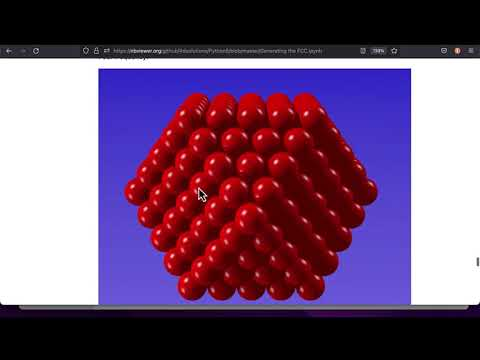

In [31]:
YouTubeVideo("KzYbq0aGYUk")

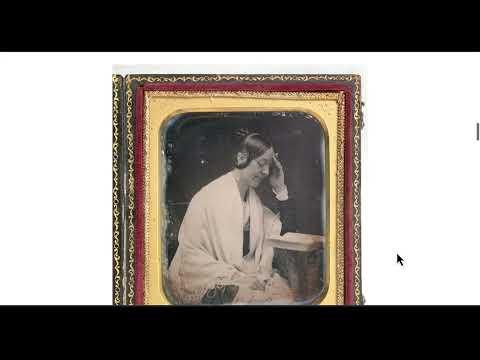

In [32]:
YouTubeVideo("3_5gUTOj4og")

[The Memo](https://kirbyurner.medium.com/memo-to-striking-teachers-4ac5fe6e80f5?sk=05f2c485d9599ad0d7b3c58c22be66b2) (in the video)